In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import os, re
from datetime import datetime

In [8]:
import csv
import requests

In [21]:

file_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv"
  
r = requests.get(file_url, stream = True)
  
with open("dpc-covid19-ita-province.csv","wb") as pdf:
    for chunk in r.iter_content(chunk_size=1024):
  
         # writing one chunk at a time to pdf file
         if chunk:
             pdf.write(chunk)

In [22]:
path = "dpc-covid19-ita-province.csv"
names = ["Padova", "Verona", "Firenze", "Pisa"]
inhabitants = {"Padova": 937908, "Verona": 926497, "Veneto":4906*10**3, "Firenze": 1.011*10**6, "Pisa":419037, "Toscana": 3.73*10**6}

In [23]:
local = {}

for name in names:
    values = []
    with open(path, 'rt') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
            if name in row:
                values.append((row[0],row[-5]))
    local[name] = values



In [24]:
path = "COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv"
names = ["Veneto", "Toscana"]
for name in names:
    values = []
    with open(path, 'rt') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
            if name in row:
                values.append([row[0], int(row[17])])
    local[name] = values



FileNotFoundError: [Errno 2] No such file or directory: 'COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv'

In [25]:
 
def nDayInzidenz(local, days, dateTimeFormat='%Y-%m-%dT%H:%M:%S'):
    ret = {}
    for name in local:
        values = local[name]
        cases = np.array([value[1] for value in values], dtype=np.int32)
        times = dates.date2num(
            [datetime.strptime(value[0], dateTimeFormat)
            for value in values])[days:]
        inzidenz = (cases[days:] - cases[:-days])/inhabitants[name]*100000
        
        ret[name] = (times, inzidenz)
    return ret
data = nDayInzidenz(local, 7)

In [26]:
def hline(value, date):
    x = [date[0], date[-1]]
    y = [value] * len(x)
    return x,y
    

Padova: 65.99794436128064
Verona: 127.14558169103624
Firenze: 133.13550939663702
Pisa: 127.91233232387594


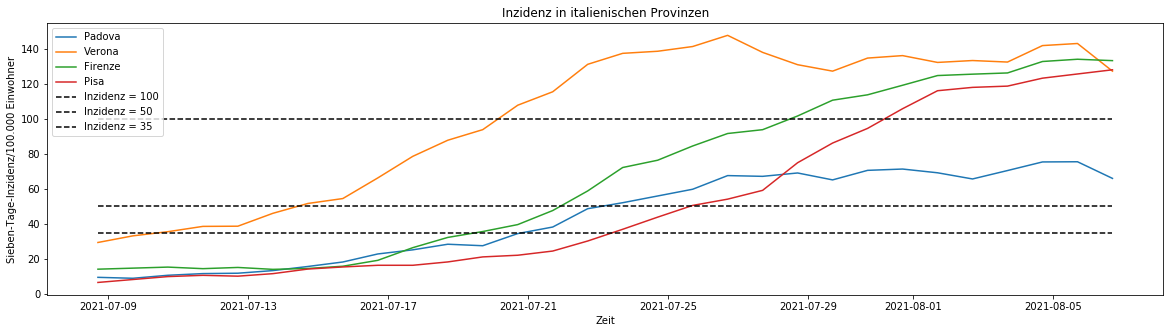

In [33]:
start = -30


plt.figure(figsize=(20, 5))
#plt.plot(*hline(10, date[start:]), '-.k', label="Inzidenz = 10")


for name in data:
    
    date, values = data[name]
    
    plt.plot_date(date[start:], values[start:], '-', label=name)
    print(f"{name}: {values[-1]}")
plt.plot(*hline(100, date[start:]), '--k', label="Inzidenz = 100")
plt.plot(*hline(50, date[start:]), '--k', label="Inzidenz = 50")
plt.plot(*hline(35, date[start:]), '--k', label="Inzidenz = 35")
plt.xlabel("Zeit")
plt.ylabel("Sieben-Tage-Inzidenz/100.000 Einwohner")
plt.legend()
plt.title("Inzidenz in italienischen Provinzen")
plt.savefig("../../../Downloads/inzidenzPD.png")